# Bike Sharing Assignment
### By Vibhav Mann

<h3><font color='red'>The Procedure will have the following methods involved : </font></h3>

 - Libraries shall be imported as and when required.
 - Steps would be explained and specified.
 - Comments would explain the idea involved in the approach to a variable or problem.
 - Theory shall be explained as per requirement.

<h3><font color='red'>There are seven steps involved in total. These are : </font></h3>

- Step 1 : Reading and Understanding the Data
- Step 2 : Data Visualisation
- Step 3 : Data Preparation
- Step 4 : Building a linear model using the backward selection technique.
- Step 5 : Residual Analysis
- Step 6: Making Predictions Using the Final Model
- Step 7: Model Evaluation

## Step 1 : Reading and Understanding the Data

In [1]:
#Import Warnings to suppress unnecessary warnings. 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the necessary libraries

import pandas as pd
import numpy as np

In [3]:
#Reading the dataset provided to us and looking at the first 5 rows of the dataset.

sharing = pd.read_csv('day.csv')
sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking the shape.

sharing.shape

(730, 16)

In [5]:
#Printing the number of rows and columns for reference later.

print('Bike_Sharing data has {} rows and {} columns '.format(sharing.shape[0], sharing.shape[1]))

Bike_Sharing data has 730 rows and 16 columns 


In [6]:
#Checking the data types and null values.

sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


###### Looking at the data for the first time, intuitively, the following things can be said:

- 'dteday' attribute should not be an object type but should be a datetime64 type.
- Similarly, the columns -> 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit' should also be of object data type and not int.

##### Thus, it can be said that the first step that needs to be done before the Data Visualisation step is to covert these attributes to their actual data type as per requirement. This can be done in two ways :
    1. We can let the encoding remain the same and just change the dtype of the column using the '.astype('object')' method.
    2. We can assign the names of the respective attributes to the encodings. This is a sub-optimal method as in certain cases, the encodings would help during the assignment of dummy variables. But, since this is my first project, I would prefer this method as it helps in better and clearer visualisation of the data.

In [7]:
#Changing the dteday column from object to datetime64

sharing['dteday'] = sharing['dteday'].astype('datetime64')

In [8]:
#Changing the data type of the season column and assigning the values of the encodings to the columns.
#1:spring, 2:summer, 3:fall, 4:winter

def ass_season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    
#Passing the above defined function to the season column and storing it in the season column.

sharing['season'] = sharing['season'].apply(ass_season)

#Looking at the head to see if the changes have taken place or not.

sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#Changing the dtype of the year column
#0: 2018, 1:2019

def ass_yr(x):
    if x==0:
        return '2018'
    else:
        return '2019'
    
#Passing the ass_yr function to the year column.

sharing['yr'] = sharing['yr'].apply(ass_yr)

#Checking if the function is working or not.

sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<font color='green'>Reiterating that this is a sub-optimal approach for assigning values to the 'yr' column. This step is not required as when creating dummy variables later we will have to assign 0 and 1 to the values. Another method to do this is just use the .astype('object') function for optimality. Again reiterating that I'm personally doing this just for better data visualisation in the initial stages.<font color='green'>

In [10]:
#Changing the dtype for the mnth column.

def ass_mnth(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'        
    })

#Passing the ass_mnth function to the mnth column

sharing[['mnth']] = sharing[['mnth']].apply(ass_mnth)

#Looking at the head to confirm the changes.

sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#Looking at the info to check which columns have not been converted yet.

sharing.info()

#We are now left with the conversion of 'holiday', 'weekday', 'workingday', 'weathersit' columns only. Let's convert them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
#Changing the dtype for the mnth column.
#Holiday has been assigned as 0 for not a holiday and 1 for a holiday. Let's convert this into Yes or No.
def ass_holiday(x):
       return x.map({1: 'Yes', 0: 'No'})
    
#Passing the ass_holiday function to the holiday column

sharing[['holiday']] = sharing[['holiday']].apply(ass_holiday)

#Looking at the head to confirm the changes.

sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,No,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,No,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,No,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,No,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,No,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<font color='green'>Again the above approach is not an optimal approach as 'yes' and 'no' will need to be converted to 0 and 1 later for modelling but it helps make the visualisation much more clear. Hence, I'm using it.<font color='green'>

In [13]:
#Changing the dtype for the weekday column.

def ass_weekday(x):
    return x.map({
        0:'Sunday',
        1:'Monday',
        2:'Tuesday',
        3:'Wednesday',
        4:'Thursday',
        5:'Friday',
        6:'Saturday'
    })

#Passing the ass_mnth function to the mnth column

sharing[['weekday']] = sharing[['weekday']].apply(ass_weekday)

#Looking at the head to confirm the changes.

sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,No,Monday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,No,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,No,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,No,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,No,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
#Changing the dtype for the workingday column.
#If day is neither weekend nor holiday is 1, otherwise is 0. Hence, 1 means a working day and 0 means not a working day.
#Thus, I'm assigning 1 to Yes(Yes, it is a working day) and 0 to No(No, it is not a working day).

def ass_workingday(x):
    return x.map({1: 'Yes', 0: 'No'})

#Passing the ass_workingday function to the mnth column

sharing[['workingday']] = sharing[['workingday']].apply(ass_workingday)

#Looking at the head to confirm the changes.

sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,No,Monday,Yes,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,No,Tuesday,Yes,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,No,Wednesday,Yes,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,No,Thursday,Yes,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,No,Friday,Yes,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
#Changing the dtype for the weathersit column.
# 1:Clear, 2:Mist, 3:Light_Snow, 4:Heavy_Rain

def ass_weathersit(x):
    return x.map({
        1:'Clear',
        2:'Mist',
        3:'Light_Snow',
        4:'Heavy_Rain'
    })
#Passing the ass_mnth function to the mnth column

sharing[['weathersit']] = sharing[['weathersit']].apply(ass_weathersit)

#Looking at the head to confirm the changes.

sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,No,Monday,Yes,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,No,Tuesday,Yes,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
#Checking the statistics of the numerical attributes.

sharing.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### By looking at the data set now, we can say the following three things :
- The 'instant' column only provides the index. Hence, it is not required.
- The 'dteday' column is not required as there already exists 'yr' and 'month' columns which have bifurcated the 'dteday' column into the required ones.
- Thus, we drop the above mentioned columns.

In [17]:
#Dropping the 'instant' and the 'dteday' columns.

sharing = sharing.drop(['dteday', 'instant'], axis=1)

In [18]:
#Let's check if the columns have been dropped successfully using the .head() command.

sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No,Monday,Yes,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No,Tuesday,Yes,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
#Looking at the columns left in the data set now.

sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

<h3><font color='green'>The target variable for our modelling is the 'cnt'(rental counts) column. So, let's have a look at the numerical statistics of the 'cnt' column.<h3><font color='green'>

In [20]:
#Looking at the numerical statistics of the 'cnt' column.

sharing['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

## Step 2 : Data Visualisation 
### This is arguably the most important step involved in the modelling process.

##### Let us now visualise the different numerical attributes against the rental count(target variable).
##### We will now import the necessary libraries involved in the visualisation process.

- We will have a look at all the columns together using a pairplot first and then separately as mentioned below.
- The numerical variables will be plotted separately. The numerical variables are temp, atemp, hum, windspeed, casual and registered.
- The categorical variables are to be plotted separately. The categorical variables are instant, season, yr, mnth, holiday, weekday, workingday, weathersit.

In [21]:
#Importing the necessary libraries.

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

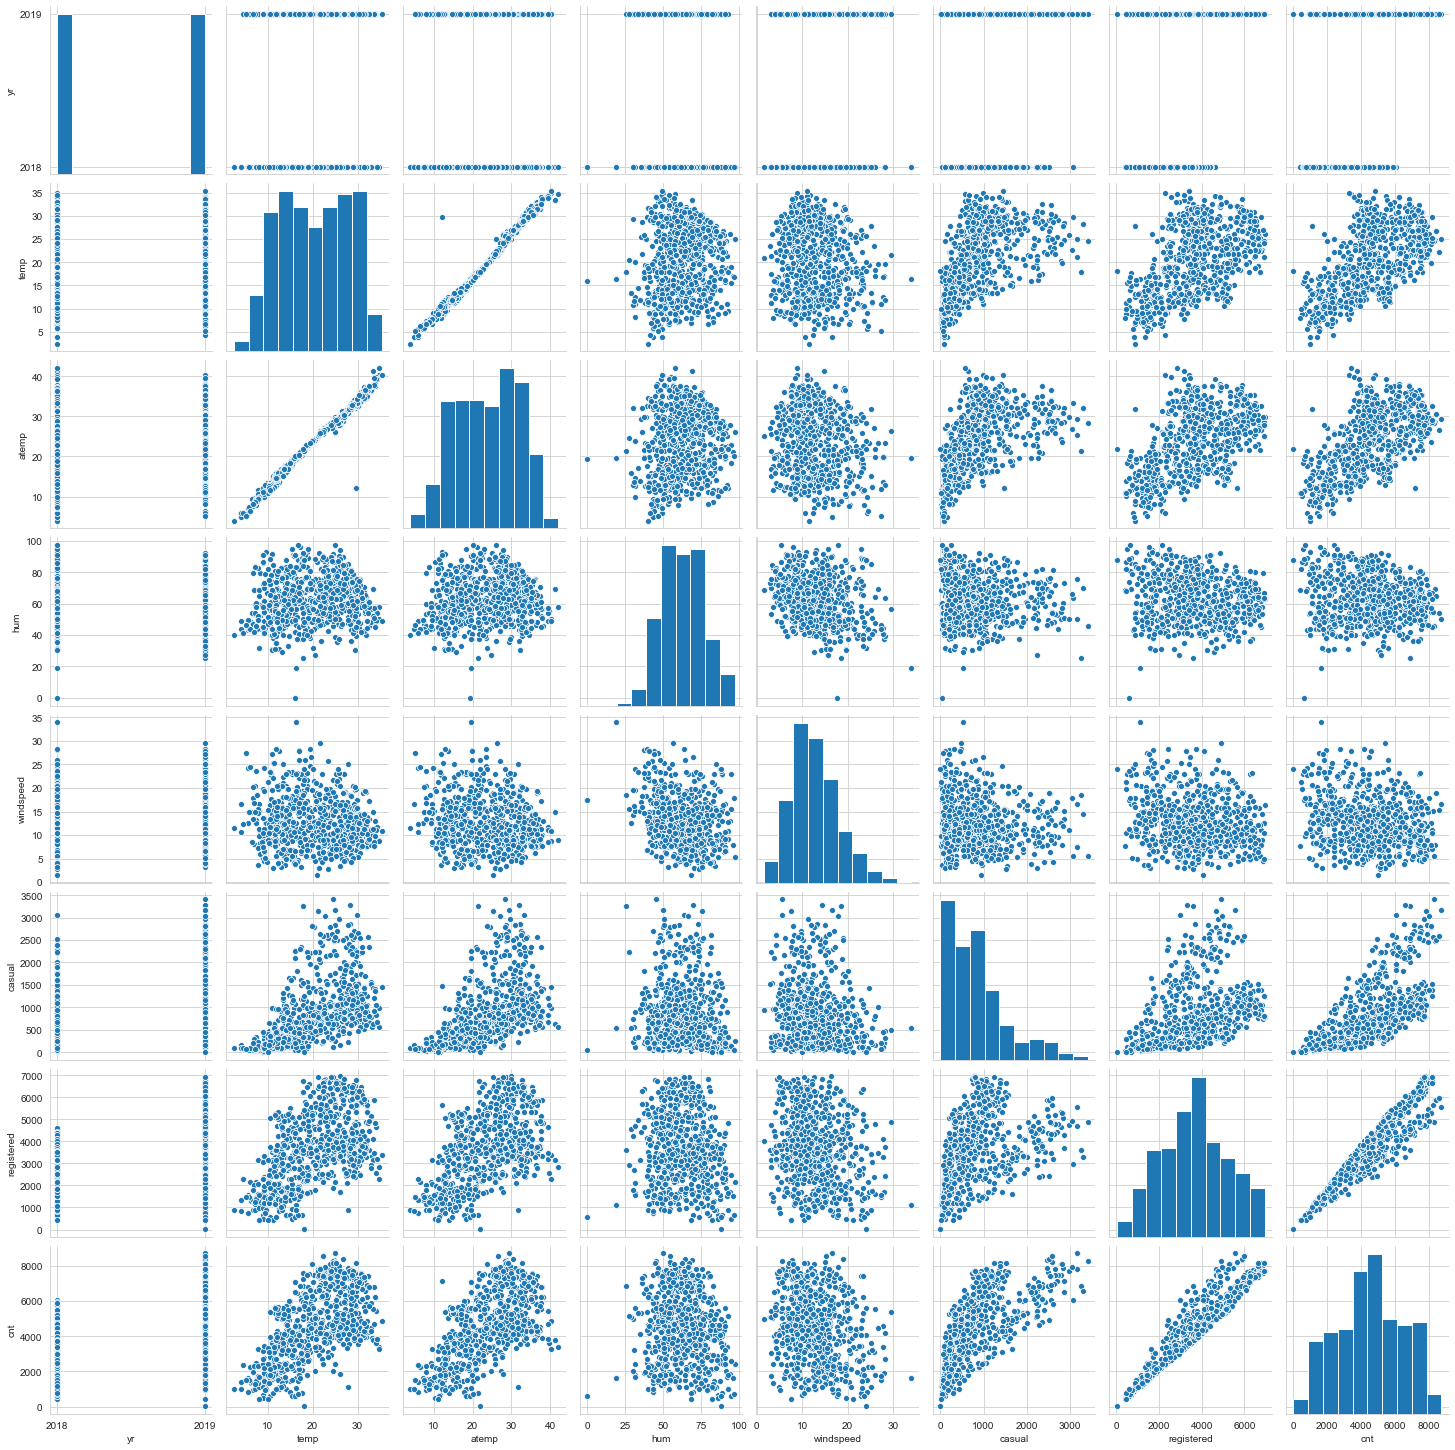

In [22]:
#Pairplot to look at all columns together.

from seaborn import pairplot 
pairplot(sharing)

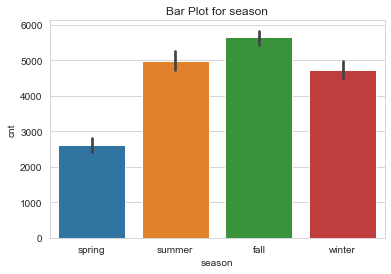

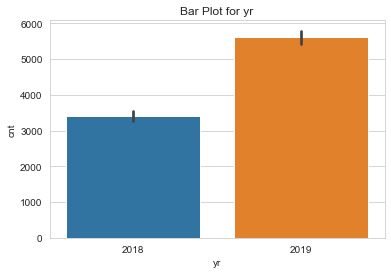

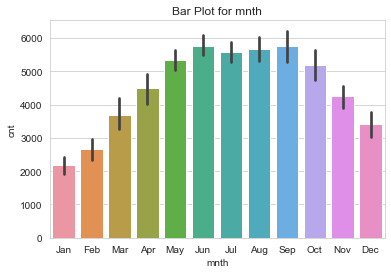

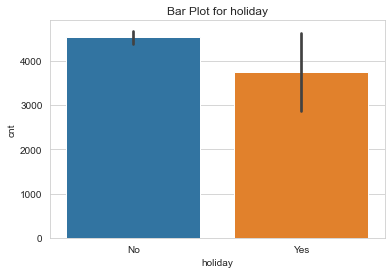

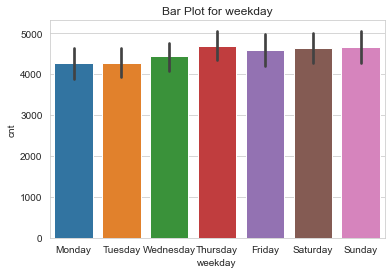

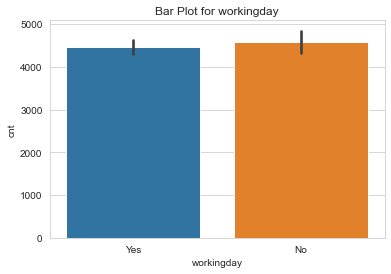

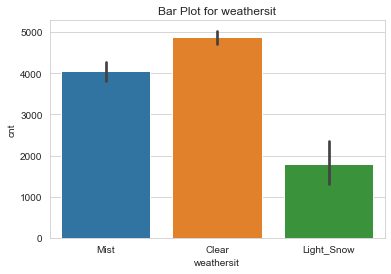

In [23]:
#Lets have a look at the barplot for the categorical variables against the cnt column(target variable) using a function.
#Defining the ctegorical columns as cat_cols.
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

#Defining a function for the categorical variables.

for col in cat_cols:
    sns.barplot(x = sharing[col], y=sharing['cnt'], data=sharing)
    plt.title('Bar Plot for ' + col)
    plt.show()

##### Looking at the bar plots of the categorical variables against the 'cnt' column, the following points can be noticed:
- Looking at the bar plot for the season variable, we can say that the maximum rental count of the bikes was observed during the fall season followed by the summer season, then winter and lastly by the spring season.
- Looking at the bar plot for the yr column, we can see that more number of bikes were rented in the year 2019 as compared to 2018 and hence, the strategies were working in favour of the company. The rental count increased from almost 3500 to 5500 which is a good increase in the count.
- Looking at the bar plot for the mnth column, the sales of the bikes seem to be highest in the months of June and September. This is followed by August, July, May, October, April, November, March, December, February. The sales seem to be lowest in the month of January which is expected as winters are at their peak during the months of January and February.
- Looking at the bar plot for the holiday column, we can say that the rental counts for the bikes were lesser when the day was a holiday and more for day that was not a holiday, which is also generally expected.
- Looking at the sales for the weekday column, we can say that the rental count of the bikes seemed to be the most on Thursdays, followed closely by Sundays, Saturdays and Fridays, then by Wednesdays and the least on Mondays and Tuesdays.
- Looking at the bar plot for the workingday column, we can say that the rental count seem to be almost the same for the day being a working day or not but slightly more for day not being a working day.
- Looking at the weathersit column, the first thing to notice is that there in no bike sale during the Heavy_Rain weather which is as expected. There could also be very minimal sales but in the dataset provided, there are none. The second thing that we can notice from the bar plot of the weathersit column is that the maximum sales is during the Clear weather, followed by the Mist weather and lastly, minimum in the Light_Snow weather. 

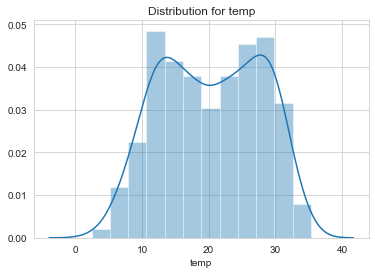

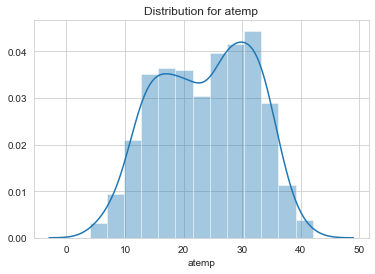

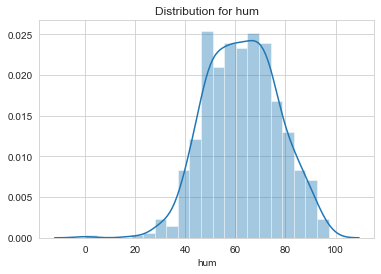

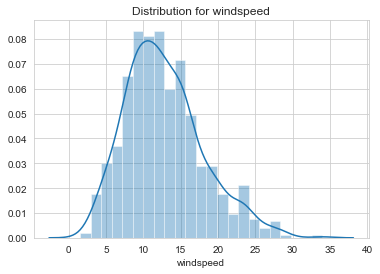

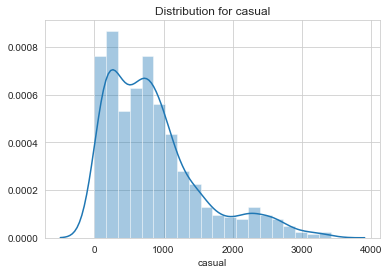

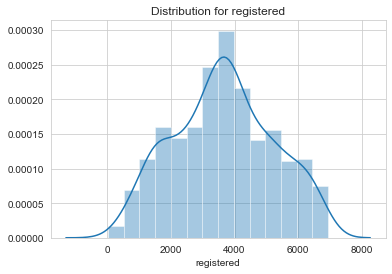

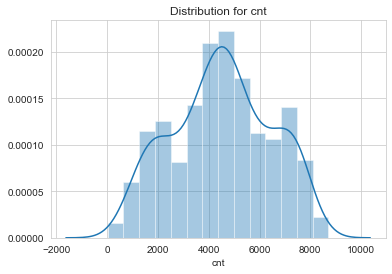

In [24]:
#Let's have a look at the pairplotfor the numerical columns using a function created for it. 

num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt']

#Defining the function for pairplots.

for col in num_cols:
    sns.distplot(sharing[col])
    plt.title('Distribution for ' + col)
    plt.show() 

##### By looking at the above distribution plots, the following insights can be made:

- Distribution for temp and atemp seems to be a bimodal distribution.
- Distribution for humidity and windspeed seems to be normal in nature.
- Distribution for registered also seems to be normal but for casual, it seems like the distribution is not very normally distributed and needs to be looked at.
- cnt is the target variable and the distribution seems normal.

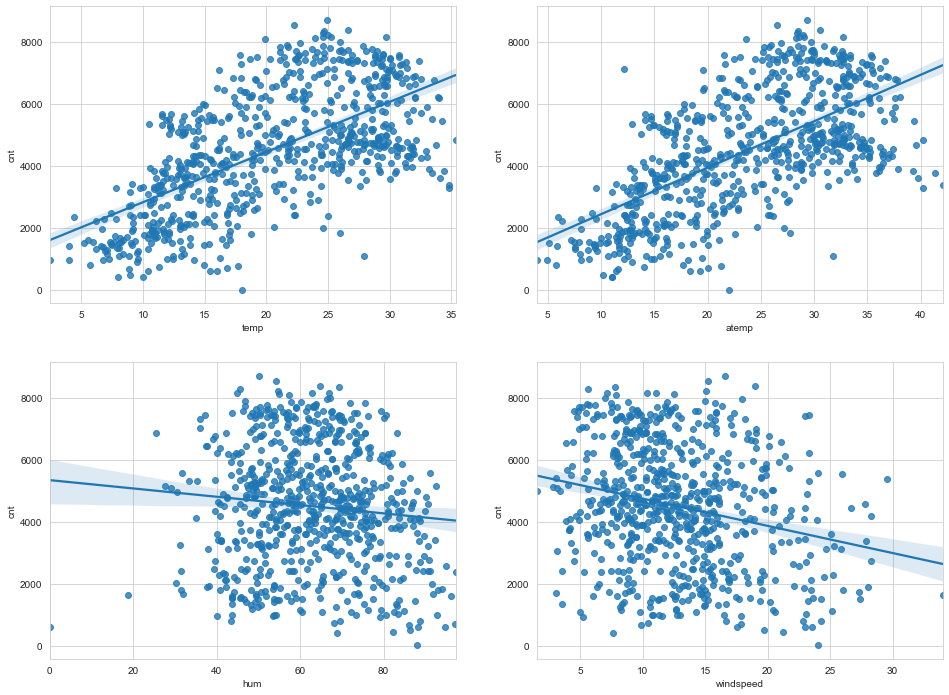

In [25]:
#Plotting subplots of the numerical variables against 'cnt' column.

plt.figure(figsize=(16, 12))
plt.subplot(2,2,1)
sns.regplot(x = 'temp', y = 'cnt', data = sharing)
plt.subplot(2,2,2)
sns.regplot(x = 'atemp', y = 'cnt', data = sharing)
plt.subplot(2,2,3)
sns.regplot(x = 'hum', y = 'cnt', data = sharing)
plt.subplot(2,2,4)
sns.regplot(x = 'windspeed', y = 'cnt', data = sharing)
plt.show()

<font color='green'>Looking at the subplots of the categorical variables vs the target variable, we do not seem to be finding any pattern of any sort in the entries. This is good but this is not the final inference. We need to check the corelation of these variables to make the final inferences before making the model.<font color='green'>

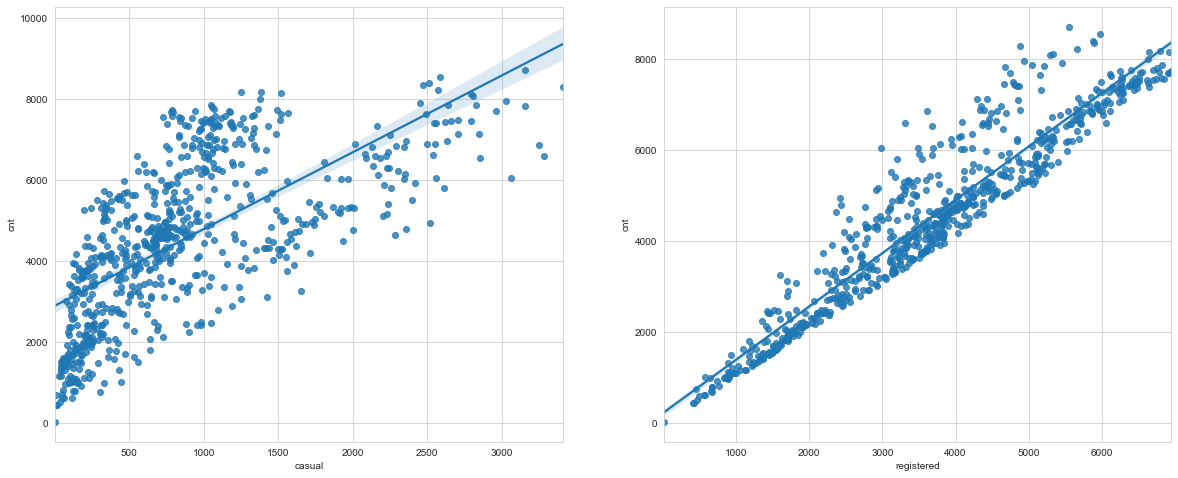

In [26]:
#Let's look at the casual and registered columns side by side to check their corelation with the cnt column.

plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.regplot(x = 'casual', y = 'cnt', data = sharing)

plt.subplot(1,2,2)
sns.regplot(x = 'registered', y = 'cnt', data = sharing)

<font color='green'>On observing the registered column vs the cnt column plot, we can notice that there seems to be a very strong linear relationship. This is because the casual and the registered columns in total form the cnt(total rental counts) column. Hence, it is naturally expected to have a strong linear relationship with one of the variables. Thus, the registered column shows strong collinearity with the cnt column.<font color='green'>

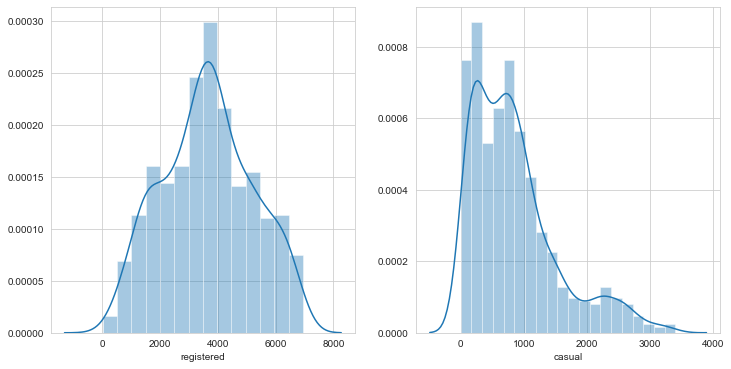

In [27]:
#Plotting a distplot for casual and registered columns.

plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(sharing['registered'])

plt.subplot(122)
sns.distplot(sharing['casual'])

<font color='green'>Looking at the distribution for the Casual entries, the distribution does not seem to be very normal. Hence, it may not help in our modelling process but this is not final. Let's first have a look at the corelation heatmaps to make the final inferences.<font color='green'>

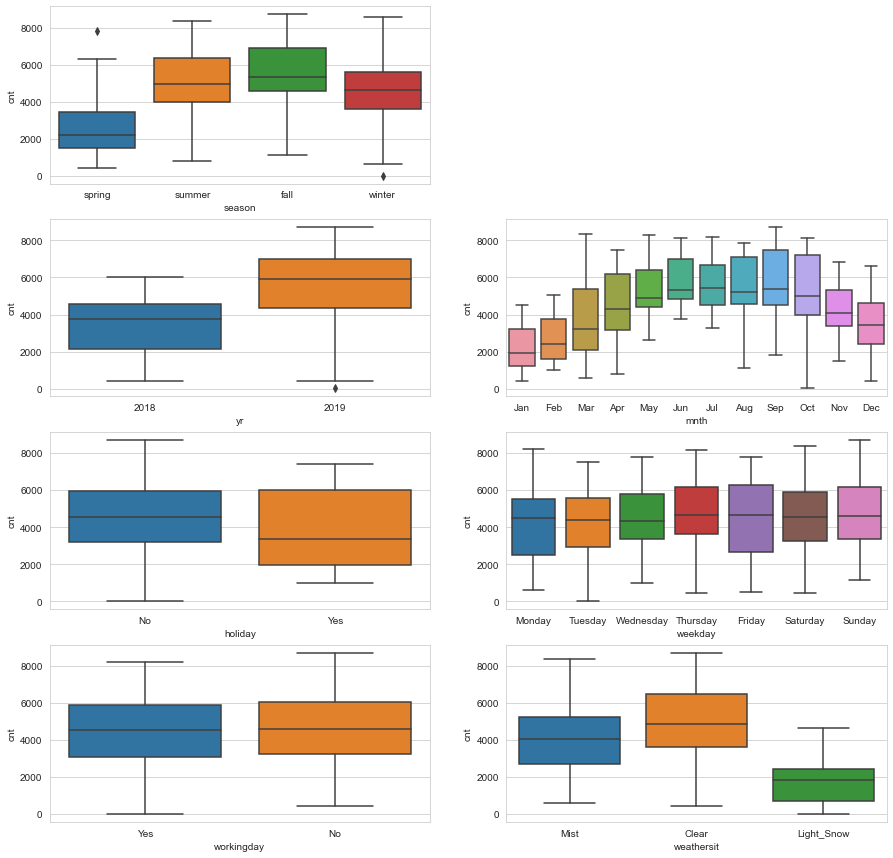

In [28]:
#Plotting subplots of the categorical variables.

plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = sharing)
plt.subplot(4,2,3)
sns.boxplot(x = 'yr', y = 'cnt', data = sharing)
plt.subplot(4,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = sharing)
plt.subplot(4,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = sharing)
plt.subplot(4,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = sharing)
plt.subplot(4,2,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = sharing)
plt.subplot(4,2,8)
sns.boxplot(x = 'weathersit', y = 'cnt', data = sharing)
plt.show()

<font color='green'>Looking at the above plots for the Categorical Variables, outliers seem to be negligible. The same goes for the Numeric Variables as well. But, just to confirm, let's also pass the numerical variables to a function as defined by me for removing the outliers if any.<font color='green'> 

In [29]:
#Function to check if there exist any outliers in the column.

outliers = []
def z_score(df, column):
    for i in column:
        z = (i - np.mean(column))/np.std(column)
        if np.abs(z) > 3:
            outliers.append(i)
    return outliers

In [30]:
#Checking the outliers for the various Numerical Variables.

a = z_score(df=sharing, column=sharing['cnt'])
print(a)

b = z_score(df=sharing, column=sharing['temp'])
print(b)

c = z_score(df=sharing, column=sharing['atemp'])
print(c)

d = z_score(df=sharing, column=sharing['hum'])
print(d)

e = z_score(df=sharing, column=sharing['windspeed'])
print(e)

[]
[]
[]
[18.7917, 0.0]
[18.7917, 0.0, 34.000021000000004, 29.584721000000002]


In [31]:
#Getting rid of the rows having outliers in the 'hum' column.

from scipy.stats import zscore

z_scores = zscore(sharing['hum'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
sharing = sharing[filtered_entries]
sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No,Monday,Yes,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No,Tuesday,Yes,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [32]:
#Getting rid of the rows having outliers in the 'windspeed' column.

from scipy.stats import zscore

z_scores = zscore(sharing['windspeed'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
sharing = sharing[filtered_entries]
sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No,Monday,Yes,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No,Tuesday,Yes,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [33]:
#Looking at the shape of the sharing df now.

sharing.shape

(725, 14)

<h3><font color='green'>Thus, we can see that originally we had 730 rows and 16 columns while now we are left with 725 rows and 12 columns.<font color='green'><h3>

In [34]:
#Let's look at the statistics once again.

sharing.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,20.341627,23.750374,62.951486,12.661751,852.551724,3666.452414,4519.004138
std,7.522706,8.164576,13.970282,5.046105,687.529549,1556.660818,1932.901983
min,2.424346,3.953480,25.416700,1.500244,2.000000,20.000000,22.000000
25%,13.803347,16.887300,52.208300,9.000914,316.000000,2507.000000,3194.000000
50%,20.602500,24.462900,62.750000,12.041843,724.000000,3667.000000,4553.000000
75%,26.889153,30.524400,73.041700,15.583932,1100.000000,4790.000000,5986.000000
max,35.328347,42.044800,97.250000,27.999836,3410.000000,6946.000000,8714.000000


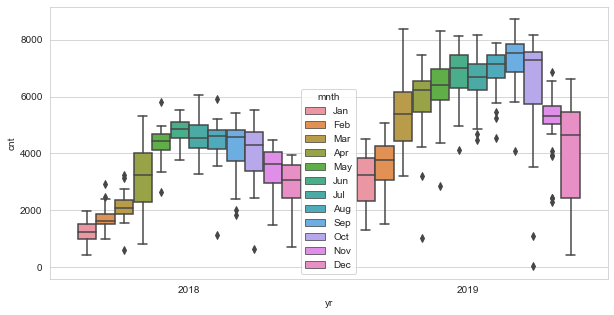

In [35]:
#We can also visualise some of these categorical features parallely by using the hue argument.

plt.figure(figsize = (10, 5))
sns.boxplot(x = 'yr', y = 'cnt', hue = 'mnth', data = sharing)
plt.show()

In [36]:
#Glancing at the corelation values for the numerical columns.

sharing[num_cols].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991721,0.123278,-0.155395,0.542052,0.538877,0.626791
atemp,0.991721,1.000000,0.136447,-0.182099,0.542862,0.543094,0.630475
hum,0.123278,0.136447,1.000000,-0.229375,-0.088424,-0.112580,-0.122119
windspeed,-0.155395,-0.182099,-0.229375,1.000000,-0.161548,-0.214596,-0.230287
casual,0.542052,0.542862,-0.088424,-0.161548,1.000000,0.392534,0.671825
registered,0.538877,0.543094,-0.112580,-0.214596,0.392534,1.000000,0.944973
cnt,0.626791,0.630475,-0.122119,-0.230287,0.671825,0.944973,1.000000


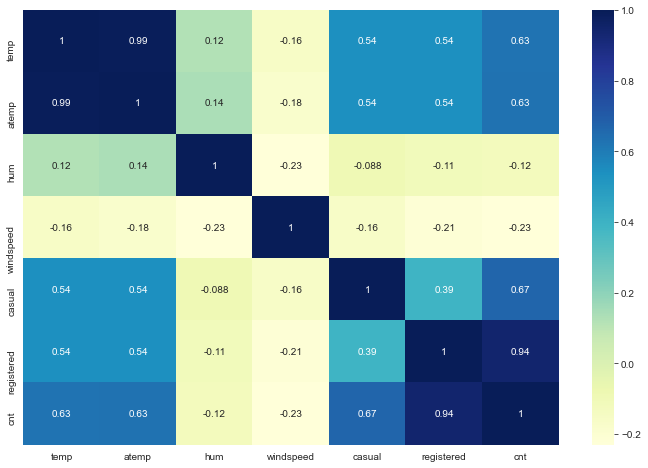

In [37]:
#Now let's have a look at the heatmap for the numerical columns to make final insights.

plt.figure(figsize = (12, 8))
sns.heatmap(sharing.corr(), annot = True, cmap="YlGnBu")
plt.show()

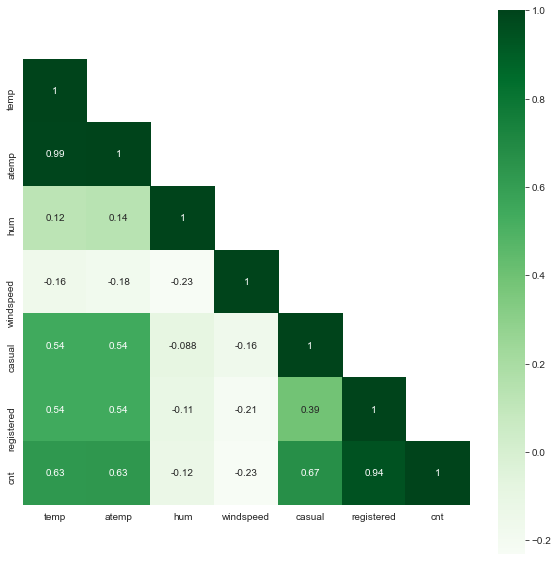

In [38]:
#For better clarity, let's have a look only at the required features in the heatmap.

mask = np.array(sharing[num_cols].corr())
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(sharing[num_cols].corr(), mask=mask, square=True, annot=True, cmap="Greens");

##### Looking at the above heatmap, the following insights can be made:

- The corelation for atemp vs temp is 0.99 which is very very high and hence, not desirable. This is a classic case of multicollinearity. A 0.99 corelation signifies that the atemp variable is able to explain 99% of the variance in the temp variable. This could lead to overfitting.
- The correlation for registered vs cnt is 0.94 which is, again, very high. This is also not desirable. 
- The correlation for casual vs cnt is 0.67 which is also very high and hence, not desirable.

<h3><font color='green'> The 'cnt' column is, basically, the sum of the casual and the registered columns. Hence, being the target variable, it is not advisable to have its bifurcations in the data set for the process of modelling as overfitting may factor in. Moreover, looking at the distribution also does not favour the chances of keeping the 'casual' and the 'registered' columns. Hence, let us drop these two columns.<h3><font color='green'>

In [39]:
#Removing the 'casual' and 'registered' columns.

sharing.drop(['casual', 'registered'], axis=1, inplace=True)

#Confirming whether the rows have been dropped or not.

sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No,Monday,Yes,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Tuesday,Yes,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3 : Data Preparation

##### In this step, we would carry out the following tasks:

- We will first check if any variables need the creation of dummy variables for modelling.
- Next, we will split the data into training and test sets.
- We would now rescale the different features.
- Finally, we would divide the training dataset into X and y train sets for the purpose of modelling.

In [40]:
#We need to get dummies for all the categorical variables. Let's do that now.
#Having a look at the columns and storing the categorical variables separately.

print(sharing.columns)

#Storing the categorical columns in a separate variable for ease.

cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']

#Getting dummies for cat_cols

cat_dummies = pd.get_dummies(sharing[cat_cols])
cat_dummies.head()

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


,season_fall,season_spring,season_summer,season_winter,yr_2018,yr_2019,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_No,workingday_Yes,weathersit_Clear,weathersit_Light_Snow,weathersit_Mist
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


<font color='green'>The drop_first method is ued to drop the first column for the created dummy variables as one of the columns can be explained using the rest of the columns. Let me explain this using an example as follows:
For the yr dummy variables, encoding has been done in the following manner:
1 corresponds to yr 2018 and 0 corresponds to 2019. Similarly for an entry having 2019 as 1, 0 would correspond to 2018.
What this means is that, if we have 1 for an entry we can identify that it is of year 2018 and hence, 0 in the same entry would mean 2019. Thus, we do not require to have the dummies for the 2019 column.<font color='green'>

In [41]:
#The following step is more optimal as explained above.

cat_dummies = pd.get_dummies(sharing[cat_cols], drop_first = True)
cat_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light_Snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
#We will now concatenate these columns to the original sharing dataframe.

sharing = pd.concat([sharing, cat_dummies], axis=1)

#Looking at the sharing dataframe to confirm the above step.

sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light_Snow,weathersit_Mist
0,spring,2018,Jan,No,Monday,Yes,Mist,14.110847,18.18125,80.5833,...,0,1,0,0,0,0,0,1,0,1
1,spring,2018,Jan,No,Tuesday,Yes,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,1,0,1
2,spring,2018,Jan,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,1,0,0
3,spring,2018,Jan,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,1,0,0,1,0,0
4,spring,2018,Jan,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [43]:
#Let's now drop the original categorical column to make the dataframe ready for modelling.

sharing.drop(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'], axis=1, inplace = True)

### Splitting the dataset into training and testing data sets.

This is done to develop a data set on which the model is built(training data set) and a data set on which the model is checked(test data set).

In [44]:
#Splitting the Data into train and test data and importing the necessary libraries. 

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Let us use MinMax scaling.

In [45]:
#Importing the necessary class.

from sklearn.preprocessing import MinMaxScaler

In [46]:
#Assigning a variable as scaler. This is a very important step.

scaler = MinMaxScaler()

In [47]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables.

num_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light_Snow,weathersit_Mist
642,0.692641,0.670569,0.519721,0.171647,8156,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
728,0.245101,0.204242,0.319025,0.826667,1796,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
479,0.520271,0.523547,0.241879,0.204993,6196,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
113,0.651106,0.632534,0.774941,0.401664,4191,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
685,0.331287,0.330942,0.405453,0.368308,5629,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [48]:
#Let's look at the numerical statistics for the df_train data.

df_train.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light_Snow,weathersit_Mist
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,...,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,0.538071,0.523087,0.526962,0.394869,4508.921105,0.244576,0.242604,0.254438,0.506903,0.088757,...,0.031558,0.157791,0.136095,0.145957,0.140039,0.143984,0.145957,0.690335,0.025641,0.349112
std,0.225799,0.215599,0.196307,0.200075,1958.354166,0.430260,0.429081,0.435975,0.500446,0.284674,...,0.174993,0.364905,0.343228,0.353411,0.347371,0.351420,0.353411,0.462812,0.158218,0.477160
min,0.000000,0.000000,0.000000,0.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.338555,0.336849,0.374129,0.249140,3127.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.531692,0.530310,0.524361,0.378337,4509.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.738329,0.705624,0.668503,0.508319,6038.500000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Let's check the correlation coefficients to see which variables are highly correlated
#Plotting a heatmap would not be very clear. Hence, we'll just have a look at the correlation values.

df_train.corr()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light_Snow,weathersit_Mist
temp,1.000000,0.989470,0.133941,-0.135345,0.639062,-0.607332,0.150455,-0.233508,0.101430,0.368642,...,-0.009410,-0.036276,0.022415,0.019773,-0.006683,0.022753,-0.006969,-0.031979,-0.046399,-0.092540
atemp,0.989470,1.000000,0.147594,-0.162400,0.644288,-0.612147,0.159715,-0.210272,0.102284,0.340193,...,-0.012482,-0.033855,0.010560,0.017847,-0.000881,0.027500,-0.006446,-0.020069,-0.050591,-0.088787
hum,0.133941,0.147594,1.000000,-0.201878,-0.143156,-0.164043,0.015452,0.119699,-0.143956,0.026986,...,-0.002010,0.027482,-0.009543,-0.020583,-0.008337,0.009822,-0.020454,0.022193,0.303456,0.516265
windspeed,-0.135345,-0.162400,-0.201878,1.000000,-0.226754,0.136897,0.094475,-0.112217,-0.033260,-0.049746,...,-0.016977,0.002140,-0.024319,0.018236,0.021817,-0.013319,0.005877,0.011352,0.106780,-0.000284
cnt,0.639062,0.644288,-0.143156,-0.226754,1.000000,-0.544777,0.128891,0.062090,0.597993,0.192681,...,-0.074512,-0.063941,0.027907,0.059810,0.021078,-0.011671,-0.021285,-0.047782,-0.206528,-0.215250
season_spring,-0.607332,-0.612147,-0.164043,0.136897,-0.544777,1.000000,-0.322032,-0.332400,-0.017035,-0.177581,...,0.028526,-0.007125,0.001663,-0.014279,-0.004825,0.028049,0.011715,-0.005970,-0.063273,0.026088
season_summer,0.150455,0.159715,0.015452,0.094475,0.128891,-0.322032,1.000000,-0.330625,-0.012417,-0.176633,...,0.003115,-0.017775,0.030332,0.013649,0.036796,-0.035519,0.013649,-0.028972,-0.033589,0.039182
season_winter,-0.233508,-0.210272,0.119699,-0.112217,0.062090,-0.332400,-0.330625,1.000000,-0.003537,-0.182320,...,-0.001839,0.008012,-0.046967,-0.023452,0.025250,-0.020303,0.002201,0.058246,0.105786,-0.000337
yr_2019,0.101430,0.102284,-0.143956,-0.033260,0.597993,-0.017035,-0.012417,-0.003537,1.000000,0.030371,...,-0.025059,-0.005977,0.011778,0.005466,0.011481,0.022430,-0.028056,-0.012084,-0.089598,-0.055631
mnth_Aug,0.368642,0.340193,0.026986,-0.049746,0.192681,-0.177581,-0.176633,-0.182320,0.030371,1.000000,...,-0.056338,-0.001914,0.017713,-0.011158,-0.046001,0.010287,0.008485,0.014024,-0.050628,0.004218


In [50]:
#Dividing the train set into X and y sets for model building.

y_train = df_train.pop('cnt')
X_train = df_train

<h1><font color='red'> We can now begin our modelling process.<h1><font color='red'>

## Step 4 : Building a linear model using the backward selection technique.

<font color='green'>The first task is to fit a regression line through the training data using statsmodels. In statsmodels, we need to explicitly add a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.<font color='green'>

In [51]:
# Check all the columns of the dataframe

sharing.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_Yes', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday_Yes',
       'weathersit_Light_Snow', 'weathersit_Mist'],
      dtype='object')

## Base Model

In [52]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                    3871.097634
temp                     1980.729320
atemp                    1887.476670
hum                     -1286.308695
windspeed               -1103.385931
season_spring            -791.893928
season_summer              37.506464
season_winter             915.155043
yr_2019                  1973.319910
mnth_Aug                  -19.249227
mnth_Dec                 -610.381603
mnth_Feb                 -202.643518
mnth_Jan                 -438.571263
mnth_Jul                 -466.464038
mnth_Jun                   59.224412
mnth_Mar                  108.107789
mnth_May                  317.490098
mnth_Nov                 -742.039864
mnth_Oct                  -99.079962
mnth_Sep                  461.786066
holiday_Yes             -1442.493692
weekday_Monday           -213.038450
weekday_Saturday         -874.222272
weekday_Sunday           -772.967833
weekday_Thursday           13.922788
weekday_Tuesday          -177.003092
weekday_Wednesday         -59.442641
w

In [53]:
#Let's take advantage of the statsmodel api and look at the summary statistics.

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     96.55
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.36e-179
Time:                        20:17:20   Log-Likelihood:                -4073.3
No. Observations:                 507   AIC:                             8207.
Df Residuals:                     477   BIC:                             8334.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3871.09

<font color='green'> Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some of these variables in order to improve the R-Squared metrics?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.<font color='green'>

<h3><font color='red'>VIF is basically a measure to check how well a variable is correlated with the other variables, excluding the target variable. A VIF value greater than 10 is definitely high and the variable needs to be eliminated.<h3><font color='red'>

In [54]:
# Checking the VIF values of the feature variables.
#Importing the necessary class first.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs.

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,425.35
1,atemp,375.66
26,workingday_Yes,56.17
2,hum,19.34
4,season_spring,13.04
22,weekday_Sunday,12.00
21,weekday_Saturday,11.51
6,season_winter,10.92
5,season_summer,9.42
16,mnth_Nov,7.35


<font color='green'>The VIF for temp column is the highest and it's p-value is also very high, so let's form another model after dropping the temp column from the train set.<font color='green'>

## Model 2

In [56]:
#Dropping temp column.

X_train.drop('temp', axis=1, inplace=True)

In [57]:
# Build a second fitted model

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [58]:
# Print the summary of the model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.57
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          8.62e-180
Time:                        20:17:21   Log-Likelihood:                -4074.7
No. Observations:                 507   AIC:                             8207.
Df Residuals:                     478   BIC:                             8330.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4028.40

In [59]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,workingday_Yes,55.31
0,atemp,38.15
1,hum,19.24
3,season_spring,13.02
21,weekday_Sunday,11.84
20,weekday_Saturday,11.26
5,season_winter,10.90
4,season_summer,9.38
15,mnth_Nov,7.33
10,mnth_Jan,6.11


##### The following new insights can be made after dropping the 'temp' variable:
- The VIF for atemp went down from 375 to 38. Even though 38 is still very high, we will consider this later. Also, the p-Value of atemp lowered from 0.108(rendering it insignificant) to 0.00(making it significant).
- The workingday_Yes column now has the highest VIF and has a high p-Value as well. So we shall now drop this column.

## Model 3

In [60]:
#Dropping workingday_Yes column.

X_train.drop('workingday_Yes', axis=1, inplace=True)

In [61]:
# Build a third fitted model

X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [62]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     102.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.43e-180
Time:                        20:17:22   Log-Likelihood:                -4076.3
No. Observations:                 507   AIC:                             8209.
Df Residuals:                     479   BIC:                             8327.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2994.69

In [63]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,29.63
1,hum,18.84
3,season_spring,11.39
5,season_winter,10.33
4,season_summer,6.12
15,mnth_Nov,5.76
16,mnth_Oct,5.18
2,windspeed,5.15
11,mnth_Jul,5.01
10,mnth_Jan,4.98


<font color='green'>The season_summer col has the highest p-Value rendering it insignificant for the modelling process. It also has a VIF greater than 5. So, let's drop the season_summer column.<font color='green'>

## Model 4

In [64]:
#Dropping season_summer column.

X_train.drop('season_summer', axis=1, inplace=True)

In [65]:
# Build a fourth fitted model

X_train_lm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [66]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     106.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.28e-181
Time:                        20:17:23   Log-Likelihood:                -4076.3
No. Observations:                 507   AIC:                             8207.
Df Residuals:                     480   BIC:                             8321.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2995.30

In [67]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,26.22
1,hum,18.07
4,season_winter,9.54
3,season_spring,8.40
14,mnth_Nov,5.52
9,mnth_Jan,4.95
15,mnth_Oct,4.81
2,windspeed,4.67
7,mnth_Dec,4.29
8,mnth_Feb,3.96


##### The following method is going to be used for selecting columns that are to be dropped or not :

- We look for columns having both p-Value and VIF being high. In this case, it is a no brainer and the column shall be dropped immediately.
- Now, we consider the columns having a high VIF, low p-Value and high p-Value, low VIF pairs. In such cases we shall give preference to those variables/columns having high p-Value first. The variables having high VIF value shall be considered later with respect to being dropped.
- For variables/columns having low VIF and low p-Values, we shall not drop them as they are important and significant for our modelling process

<font color='green'>We notice that the p-Value for weekday_Thursday is 0.939 but it's VIF value is low. Hence, let's drop the weekday_Thursday col now.<font color='green'>

## Model 5

In [68]:
#Dropping weekday_Thursday column.

X_train.drop('weekday_Thursday', axis=1, inplace=True)

In [69]:
# Build a fifth fitted model

X_train_lm = sm.add_constant(X_train)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [70]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.08e-182
Time:                        20:17:24   Log-Likelihood:                -4076.3
No. Observations:                 507   AIC:                             8205.
Df Residuals:                     481   BIC:                             8314.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3000.15

In [71]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,25.12
1,hum,17.97
4,season_winter,9.54
3,season_spring,8.39
14,mnth_Nov,5.50
9,mnth_Jan,4.84
15,mnth_Oct,4.80
2,windspeed,4.56
7,mnth_Dec,4.24
8,mnth_Feb,3.89


<font color='green'>Let us now drop the 'mnth_Oct' column as it has very high p-Value.<font color='green'>

## Model 6

In [72]:
#Dropping mnth_Oct column.

X_train.drop('mnth_Oct', axis=1, inplace=True)

In [73]:
# Build a sixth fitted model

X_train_lm = sm.add_constant(X_train)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [74]:
# Print the summary of the model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.93e-183
Time:                        20:17:24   Log-Likelihood:                -4076.3
No. Observations:                 507   AIC:                             8203.
Df Residuals:                     482   BIC:                             8308.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2985.50

In [75]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,24.48
1,hum,17.63
3,season_spring,7.10
2,windspeed,4.54
9,mnth_Jan,3.88
4,season_winter,3.80
8,mnth_Feb,3.12
10,mnth_Jul,2.88
23,weathersit_Mist,2.78
6,mnth_Aug,2.63


<font color='green'>Dropping the weekday_Wednesday column now due to its high p-Value.<font color='green'>

## Model 7

In [76]:
#Dropping weekday_Wednesday column.

X_train.drop('weekday_Wednesday', axis=1, inplace=True)

In [77]:
# Build a seventh fitted model

X_train_lm = sm.add_constant(X_train)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [78]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     121.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.94e-184
Time:                        20:17:25   Log-Likelihood:                -4076.4
No. Observations:                 507   AIC:                             8201.
Df Residuals:                     483   BIC:                             8302.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2964.57

In [79]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,24.42
1,hum,17.51
3,season_spring,7.10
2,windspeed,4.49
9,mnth_Jan,3.87
4,season_winter,3.77
8,mnth_Feb,3.11
10,mnth_Jul,2.86
22,weathersit_Mist,2.78
6,mnth_Aug,2.62


<font color='green'>Dropping the mnth_Aug column now due to its high p-Value<font color='green'>

## Model 8

In [80]:
#Dropping mnth_Aug column.

X_train.drop('mnth_Aug', axis=1, inplace=True)

In [81]:
# Build a eighth fitted model

X_train_lm = sm.add_constant(X_train)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [82]:
# Print the summary of the model

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.96e-185
Time:                        20:17:25   Log-Likelihood:                -4076.6
No. Observations:                 507   AIC:                             8199.
Df Residuals:                     484   BIC:                             8296.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2959.42

In [83]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,17.30
0,atemp,15.79
3,season_spring,7.01
2,windspeed,4.44
8,mnth_Jan,3.87
4,season_winter,3.12
7,mnth_Feb,3.11
21,weathersit_Mist,2.76
11,mnth_Mar,2.25
5,yr_2019,2.15


<font color='green'>Dropping the mnth_Mar column as it has a very high p-Value.<font color='green'>

## Model 9

In [84]:
#Dropping mnth_Mar column.

X_train.drop('mnth_Mar', axis=1, inplace=True)

# Build a ninth fitted model

X_train_lm = sm.add_constant(X_train)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [85]:
# Print the summary of the model

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     133.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.08e-186
Time:                        20:17:26   Log-Likelihood:                -4076.8
No. Observations:                 507   AIC:                             8198.
Df Residuals:                     485   BIC:                             8291.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3023.71

In [86]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,16.95
0,atemp,15.65
3,season_spring,4.41
2,windspeed,4.34
4,season_winter,3.12
20,weathersit_Mist,2.76
8,mnth_Jan,2.39
5,yr_2019,2.13
7,mnth_Feb,2.01
12,mnth_Nov,1.99


<font color='green'>Dropping the mnth_Jun column due to high p-Value.<font color='green'>

## Model 10

In [87]:
#Dropping mnth_Jun column.

X_train.drop('mnth_Jun', axis=1, inplace=True)

# Build a tenth fitted model

X_train_lm = sm.add_constant(X_train)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [88]:
# Print the summary of the model

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.18e-187
Time:                        20:17:26   Log-Likelihood:                -4077.0
No. Observations:                 507   AIC:                             8196.
Df Residuals:                     486   BIC:                             8285.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3021.21

In [89]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,16.66
0,atemp,13.41
2,windspeed,4.34
3,season_spring,4.32
4,season_winter,3.00
19,weathersit_Mist,2.76
8,mnth_Jan,2.36
5,yr_2019,2.13
7,mnth_Feb,2.00
11,mnth_Nov,1.99


<font color='green'>Dropping the weekday_Saturday column due to its high p-Value.<font color='green'>

## Model 11

In [90]:
#Dropping weekday_Saturday column.

X_train.drop('weekday_Saturday', axis=1, inplace=True)

# Build a eleventh fitted model

X_train_lm = sm.add_constant(X_train)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [91]:
# Print the summary of the model

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     147.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.74e-188
Time:                        20:17:26   Log-Likelihood:                -4077.4
No. Observations:                 507   AIC:                             8195.
Df Residuals:                     487   BIC:                             8279.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3051.95

In [92]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,16.65
0,atemp,13.22
2,windspeed,4.33
3,season_spring,4.31
4,season_winter,3.00
18,weathersit_Mist,2.75
8,mnth_Jan,2.36
5,yr_2019,2.13
7,mnth_Feb,1.99
11,mnth_Nov,1.98


<font color='green'>Dropping the mnth_Feb column due to its high p-Value.<font color='green'>

## Model 12

In [93]:
#Dropping mnth_Feb column.

X_train.drop('mnth_Feb', axis=1, inplace=True)

# Build a twelfth fitted model

X_train_lm = sm.add_constant(X_train)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [94]:
# Print the summary of the model

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          9.53e-189
Time:                        20:17:27   Log-Likelihood:                -4078.6
No. Observations:                 507   AIC:                             8195.
Df Residuals:                     488   BIC:                             8276.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2984.04

In [95]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,16.55
0,atemp,13.08
2,windspeed,4.33
4,season_winter,2.96
3,season_spring,2.77
17,weathersit_Mist,2.75
5,yr_2019,2.12
10,mnth_Nov,1.95
7,mnth_Jan,1.70
6,mnth_Dec,1.53


<font color='green'>Dropping the weekday_Sunday column due to its high p-Value.<font color='green'>

## Model 13

In [96]:
#Dropping weekday_Sunday column.

X_train.drop('weekday_Sunday', axis=1, inplace=True)

# Build a thirteenth fitted model

X_train_lm = sm.add_constant(X_train)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [97]:
# Print the summary of the model

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.08e-189
Time:                        20:17:28   Log-Likelihood:                -4080.1
No. Observations:                 507   AIC:                             8196.
Df Residuals:                     489   BIC:                             8272.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3026.74

In [98]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,16.54
0,atemp,12.95
2,windspeed,4.30
4,season_winter,2.96
3,season_spring,2.76
16,weathersit_Mist,2.73
5,yr_2019,2.12
10,mnth_Nov,1.95
7,mnth_Jan,1.70
6,mnth_Dec,1.52


<h4><font color='red'>Now that all the variables are significant(having low p-Value), let us now drop the variables/features having a high VIF value.<h4><font color='red'>

<font color='green'>Dropping the hum column due to its high VIF value.<font color='green'>

## Model 14

In [99]:
#Dropping hum column.

X_train.drop('hum', axis=1, inplace=True)

# Build a fourteenth fitted model

X_train_lm = sm.add_constant(X_train)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [100]:
# Print the summary of the model

print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     163.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          9.26e-185
Time:                        20:17:28   Log-Likelihood:                -4093.5
No. Observations:                 507   AIC:                             8221.
Df Residuals:                     490   BIC:                             8293.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2636.01

In [101]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,5.63
1,windspeed,4.24
3,season_winter,2.74
2,season_spring,2.36
4,yr_2019,2.09
9,mnth_Nov,1.92
6,mnth_Jan,1.68
15,weathersit_Mist,1.56
5,mnth_Dec,1.48
7,mnth_Jul,1.46


<font color='green'>Dropping atemp column due to VIF being greater than 5.<font color='green'>

## Model 15

In [102]:
#Dropping atemp column.

X_train.drop('atemp', axis=1, inplace=True)

# Build a fifteenth fitted model

X_train_lm = sm.add_constant(X_train)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [103]:
# Print the summary of the model

print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     129.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.15e-159
Time:                        20:17:28   Log-Likelihood:                -4156.2
No. Observations:                 507   AIC:                             8344.
Df Residuals:                     491   BIC:                             8412.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4922.69

In [104]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,2.89
2,season_winter,2.68
1,season_spring,2.33
8,mnth_Nov,1.90
3,yr_2019,1.79
5,mnth_Jan,1.65
14,weathersit_Mist,1.52
4,mnth_Dec,1.47
11,weekday_Monday,1.21
7,mnth_May,1.19


<font color='green'>Dropping the mnth_Jul column due to its high p-Value.<font color='green'>

## Model 16

In [105]:
#Dropping mnth_Jul column.

X_train.drop('mnth_Jul', axis=1, inplace=True)

# Build a sixteenth fitted model

X_train_lm = sm.add_constant(X_train)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

In [106]:
# Print the summary of the model

print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     138.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.43e-160
Time:                        20:17:28   Log-Likelihood:                -4157.6
No. Observations:                 507   AIC:                             8345.
Df Residuals:                     492   BIC:                             8409.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4991.04

In [107]:
#Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,2.80
2,season_winter,2.64
1,season_spring,2.26
7,mnth_Nov,1.90
3,yr_2019,1.76
5,mnth_Jan,1.65
13,weathersit_Mist,1.52
4,mnth_Dec,1.47
10,weekday_Monday,1.20
11,weekday_Tuesday,1.18


<font color='green'>Dropping the mnth_May column due to it's high p-Value.<font color='green'>

## Model 17

In [108]:
#Dropping mnth_May column.

X_train.drop('mnth_May', axis=1, inplace=True)

# Build a seventeenth fitted model

X_train_lm = sm.add_constant(X_train)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

In [109]:
# Print the summary of the model

print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     148.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          6.18e-161
Time:                        20:17:29   Log-Likelihood:                -4158.4
No. Observations:                 507   AIC:                             8345.
Df Residuals:                     493   BIC:                             8404.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5031.25

In [110]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,2.66
2,season_winter,2.60
1,season_spring,2.19
6,mnth_Nov,1.90
3,yr_2019,1.76
5,mnth_Jan,1.65
12,weathersit_Mist,1.49
4,mnth_Dec,1.47
9,weekday_Monday,1.19
10,weekday_Tuesday,1.18


<font color='green'>Dropping the season_winter column due to its high p-Value.

## Model 18

In [111]:
#Dropping season_winter column.

X_train.drop('season_winter', axis=1, inplace=True)

# Build a eighteenth fitted model

X_train_lm = sm.add_constant(X_train)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

In [112]:
# Print the summary of the model

print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     160.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.52e-161
Time:                        20:17:29   Log-Likelihood:                -4159.6
No. Observations:                 507   AIC:                             8345.
Df Residuals:                     494   BIC:                             8400.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5072.35

In [113]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,2.61
1,season_spring,2.04
2,yr_2019,1.73
4,mnth_Jan,1.64
11,weathersit_Mist,1.48
8,weekday_Monday,1.19
9,weekday_Tuesday,1.18
5,mnth_Nov,1.14
6,mnth_Sep,1.14
3,mnth_Dec,1.13


<font color='green'>Dropping the weekday_Tuesday column due to its hgih p-Value.

## Model 19

In [114]:
#Dropping weekday_Tuesday column.

X_train.drop('weekday_Tuesday', axis=1, inplace=True)

# Build a nineteenth fitted model

X_train_lm = sm.add_constant(X_train)

lr_18 = sm.OLS(y_train, X_train_lm).fit()

In [115]:
# Print the summary of the model

print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.16e-162
Time:                        20:17:29   Log-Likelihood:                -4161.2
No. Observations:                 507   AIC:                             8346.
Df Residuals:                     495   BIC:                             8397.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5038.15

In [116]:
# Calculating the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,2.54
1,season_spring,2.04
2,yr_2019,1.72
4,mnth_Jan,1.63
10,weathersit_Mist,1.48
8,weekday_Monday,1.17
5,mnth_Nov,1.14
3,mnth_Dec,1.13
6,mnth_Sep,1.13
9,weathersit_Light_Snow,1.08


<h4><font color='red'>Now we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model as the final model.

## Step 5 : Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [117]:
#Predicting the y_train_cnt value.

y_train_cnt = lr_18.predict(X_train_lm)

Text(0.5, 0, 'Errors')

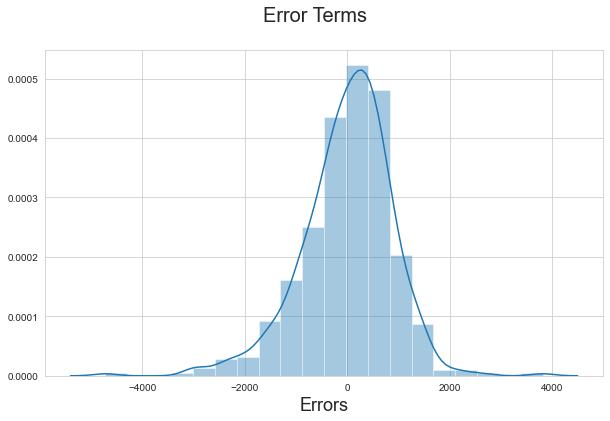

In [118]:
# Plot the histogram of the error terms

fig = plt.figure(figsize=[10,6])
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

<h4><font color='red'> The error terms seem to be distributed normally which is good.

## Step 6: Making Predictions Using the Final Model¶

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. nineteenth model.

We shall now applying the scaling on the test sets as our first task.

In [119]:
#Scaling the test set.

num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [120]:
#Confirming the above action.

df_test.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light_Snow,weathersit_Mist
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.559558,0.545490,0.512211,0.389003,4542.454128,0.238532,0.279817,0.220183,0.486239,0.077982,...,0.022936,0.105505,0.151376,0.137615,0.151376,0.146789,0.137615,0.692661,0.032110,0.316514
std,0.234907,0.224852,0.190215,0.206324,1876.590992,0.427167,0.449942,0.415324,0.500961,0.268760,...,0.150043,0.307910,0.359240,0.345288,0.359240,0.354710,0.345288,0.462453,0.176698,0.466186
min,0.046591,0.026455,0.030161,-0.053367,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360361,0.365473,0.364559,0.243305,3228.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.574785,0.575514,0.513341,0.349135,4615.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.774412,0.743429,0.652294,0.511217,5842.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,1.019437,0.954151,1.006644,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [121]:
y_test = df_test.pop('cnt')
X_test = df_test

In [122]:
# Adding constant variable to test dataframe

X_test_m18 = sm.add_constant(X_test)

#Looking at the head of X_test_m19

X_test_m18.head()

,const,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Yes,weathersit_Light_Snow,weathersit_Mist
241,1.0,0.722754,0.689995,0.409512,0.221652,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
494,1.0,0.556613,0.552272,0.414732,0.728332,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
591,1.0,0.806862,0.769392,0.508700,0.341620,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
489,1.0,0.700948,0.676485,0.699536,0.296651,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
151,1.0,0.878510,0.858954,0.588746,0.441643,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [123]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m18 = X_test_m18.drop(['temp', 'atemp', 'hum', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Sep','weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday_Yes'], axis = 1)

In [124]:
# Making predictions using the nineteenth model.

y_pred_m18 = lr_18.predict(X_test_m18)

## Step 7: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

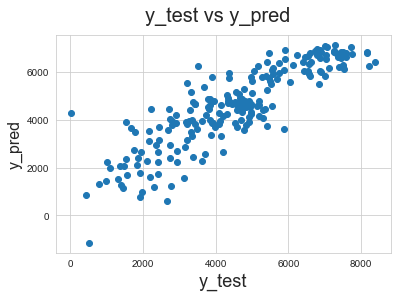

In [125]:
#Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m18)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 

<h3><font color='red'>We use the R-Squared score to check whether the trained model fits well on the test set as well or not. If the computed R-Square score comes to be around each other, we can say that the train data model is able to predict on the test data as well. So, let's check if this is happening or not.

In [126]:
#Importing the necessary library to compute the R-Squared score.

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m18)

0.7522922430164857

### The R-Squared score for our final model ie Model 19 came out to be 0.790 and that of the test set data came out to be 0.752 which is very close to each other. Hence, it can be concluded that our model works well on the test data as well.

## Step 8 : Regression DIagnostics

## Residuals vs predicting variables Plots

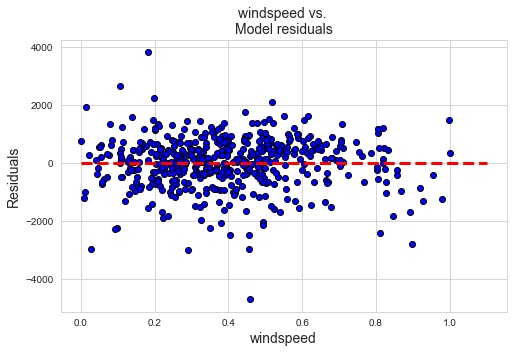

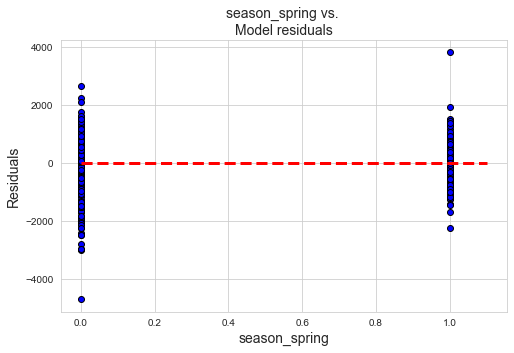

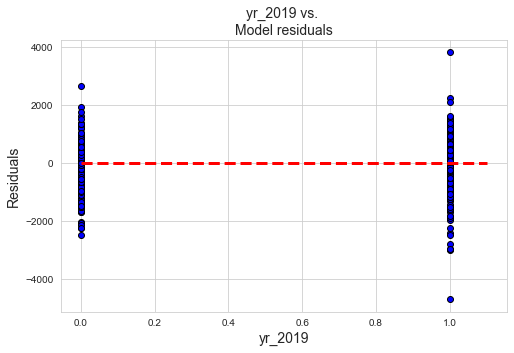

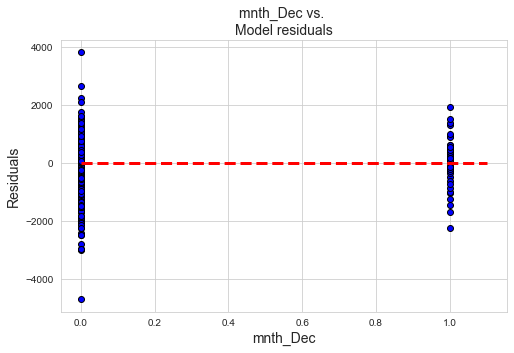

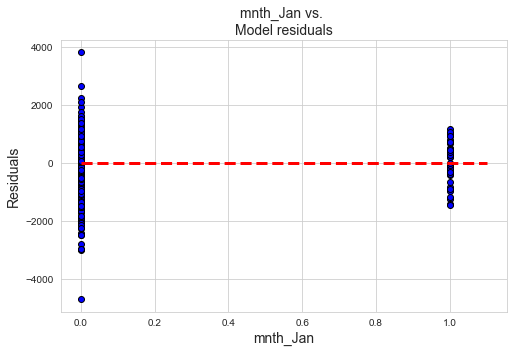

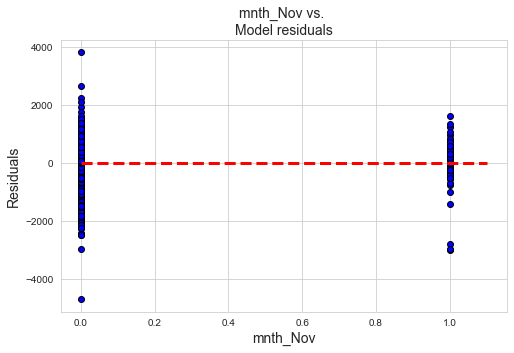

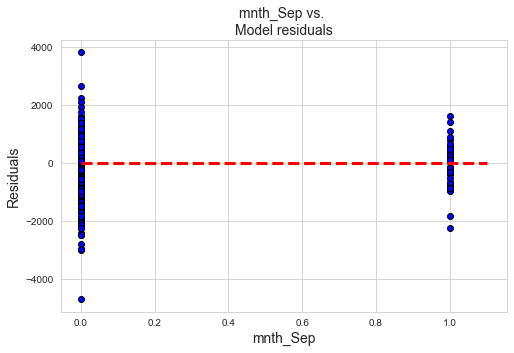

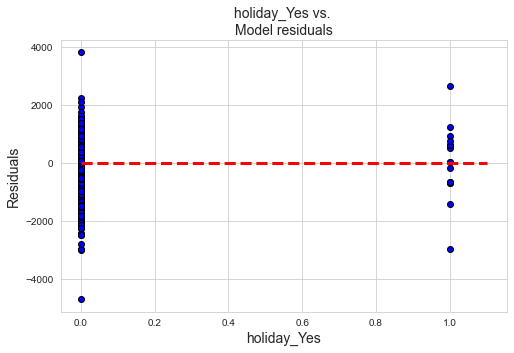

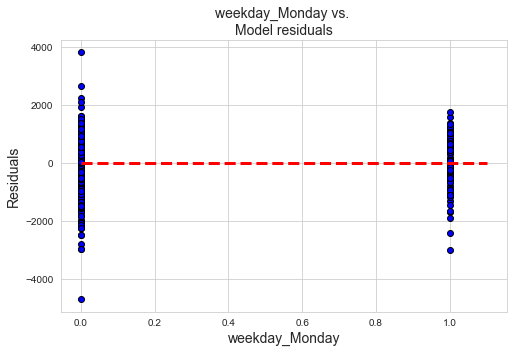

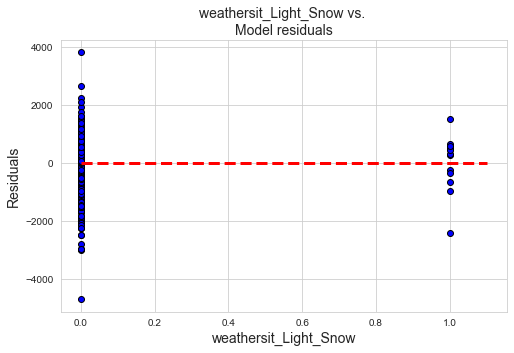

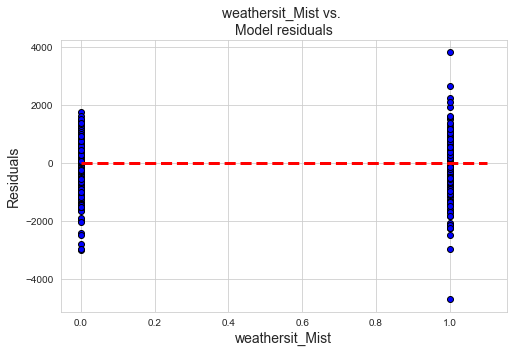

In [127]:
for c in X_train.columns:
    plt.figure(figsize=(8,5))
    plt.title('{} vs. \nModel residuals'.format(c), fontsize=14)
    plt.scatter(x=X_train[c], y=lr_18.resid, color='blue', edgecolor='k')
    plt.grid(True)
    xmin = min(X_train[c])
    xmax = max(X_train[c])
    plt.hlines(y=0, xmin=xmin*0.9, xmax=xmax*1.1, color='red', linestyle='--', lw=3)
    plt.xlabel(c, fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

<h3><font color='red'>Residual plots show some bit of clustering but overall the assumptions linearity and independence seem to hold because the distribution seem random around the 0 axis.

## Fitted vs Residuals scatter plot

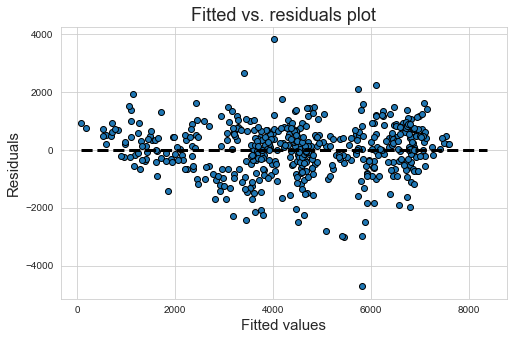

In [128]:
plt.figure(figsize=(8,5))
p = plt.scatter(x=lr_18.fittedvalues, y=lr_18.resid, edgecolor='k')
xmin = min(lr_18.fittedvalues)
xmax = max(lr_18.fittedvalues)
plt.hlines(y=0, xmin=0.9*xmin, xmax=1.1*xmax, linestyle='--', lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

<h3><font color = 'red'>When we plot the fitted response values (as per the model) vs. the residuals, we clearly observe that the variance of the residuals increases with response variable magnitude. Therefore, the problem does not respect homoscedasticity and some kind of variable transformation may be needed to improve model quality.

## Histogram of Normalized Resdiuals

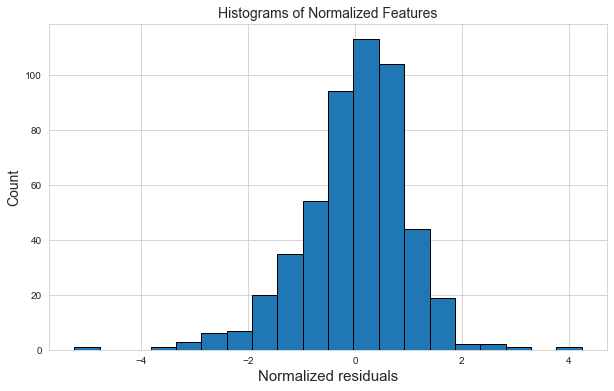

In [129]:
plt.figure(figsize=(10,6))
plt.hist(lr_18.resid_pearson, bins=20, edgecolor='k')
plt.ylabel('Count', fontsize=14)
plt.xlabel('Normalized residuals', fontsize=15)
plt.title('Histograms of Normalized Features', fontsize=14)
plt.show()

## Q-Q Plot of Residuals

<Figure size 864x720 with 0 Axes>

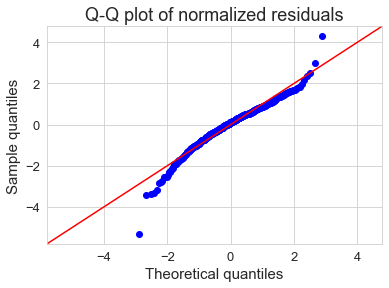

In [130]:
from statsmodels.graphics.gofplots import qqplot 

plt.figure(figsize=(12,10))
qqplot(lr_18.resid_pearson, line='45', fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

<h3><font color = 'red'>The Q-Q plot (and the histogram above) shows that the normality assumption is satisfied pretty well.